<a href="https://colab.research.google.com/github/pawansharma18/Spark-task1-data-science/blob/main/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pawan Sharma**
## Task 1 - Prediction Using Supervised ML

Predicting the percentage of an student based on the  number of study hours.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading dataset

In [3]:
data_df = pd.read_csv('http://bit.ly/w-data')
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [24]:
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
data_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
data_df.shape

(25, 2)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization


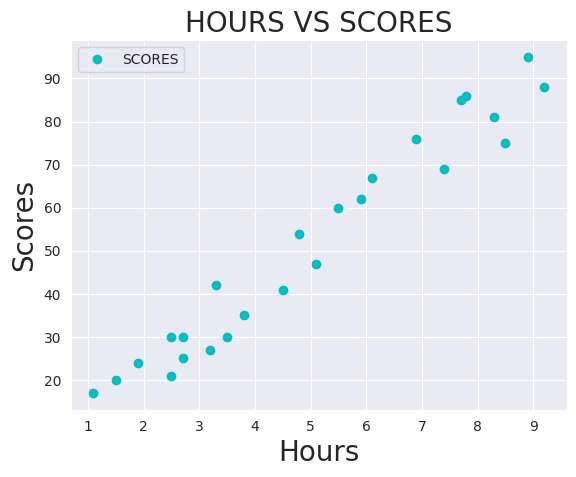

In [22]:
sns.set_style('darkgrid')
plt.plot(data_df['Hours'],data_df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('HOURS VS SCORES',fontsize = 20)
plt.legend(['SCORES']);

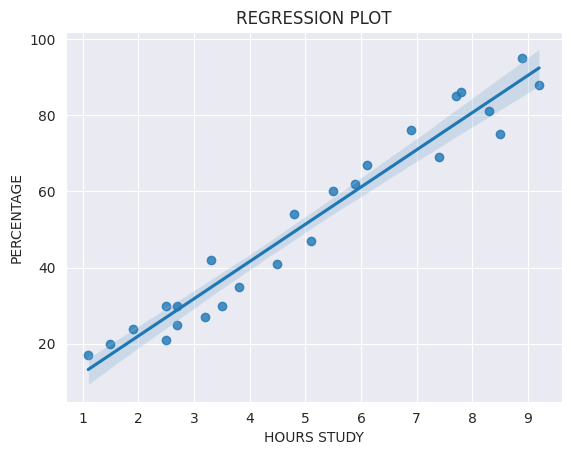

In [20]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('REGRESSION PLOT')
plt.xlabel('HOURS STUDY')
plt.ylabel('PERCENTAGE');

# Boxplot

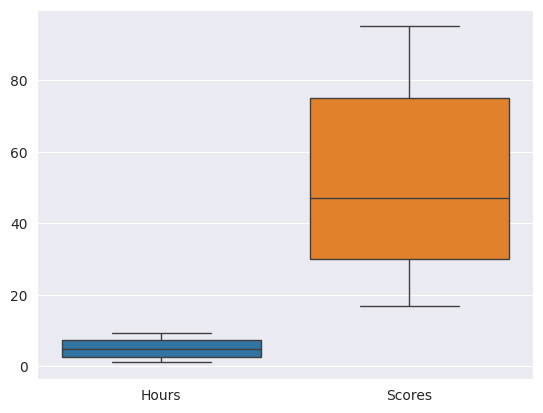

In [10]:
sns.boxplot(data=data_df[['Hours','Scores']]);

# dataset Splitting

In [11]:
X = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)

In [13]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

#### Here `80%` of the data is used for `training` and `20%` is used for `testing`.

# Training MODEL

In [14]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)

LinearRegression()

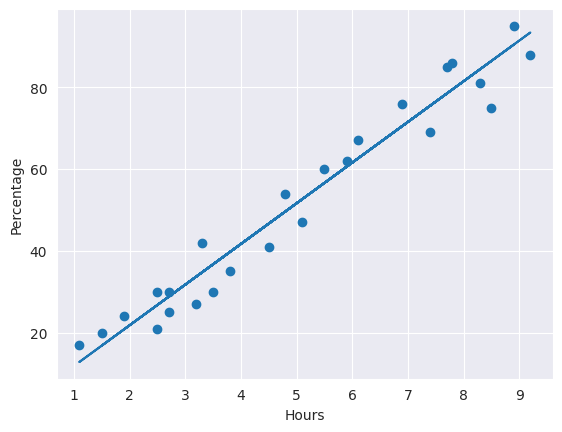

In [15]:
line = lg.coef_ * X + lg.intercept_
plt.scatter(data_df['Hours'],data_df['Scores'])
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');

# Making Prediction


In [16]:
y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


# Actual Score Vs. Predicted Score

In [28]:
pred = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score %':y_pred})
pred

,Actual Score,Predicted Score %
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


# predicted score if a student studies for 8.36 hrs/ day?

In [26]:
hours = np.array([[8.36]])
pred = lg.predict(hours)
print('Number of hours = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%pred)

Number of hours = 8.36
Predicted Score = 85.04


<ipython-input-26-0f252c0c3279>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted Score = %.2f'%pred)


#### if a student `studies` `8.36` hours a day, it is likely that they will score `score` `85.04` marks

# Evaluating Model

In [27]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error = %.2f'%mean_absolute_error(Y_test,y_pred))

Mean absolute error = 4.14


**Small `mean absolute error` depicts the probability of error are `very less`.**